In [ ]:
# Exercise - Characterizing the network (I)

len(G.nodes())
56519  #The output from Datacamp. Number of nodes in the graph G

len(G.edges())
72900  #The output from Datacamp. Number of edges in the graph G

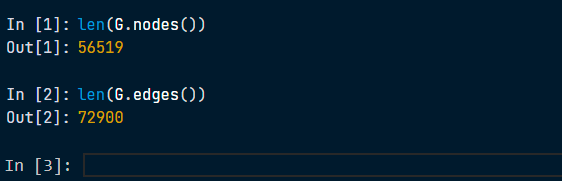

In [ ]:
# Exercise - Characterizing the network (II)
# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx

# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.degree_centrality(G).values()))
plt.show()


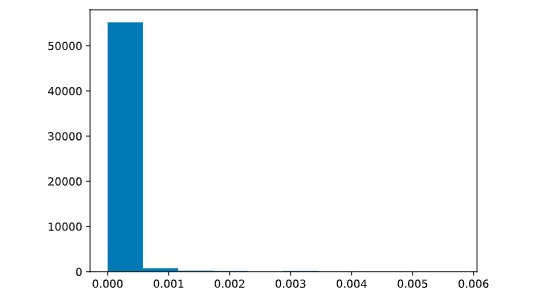

In [ ]:
# Exercise - Characterizing the network (III)
# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx

# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.betweenness_centrality(G).values()))
plt.show()

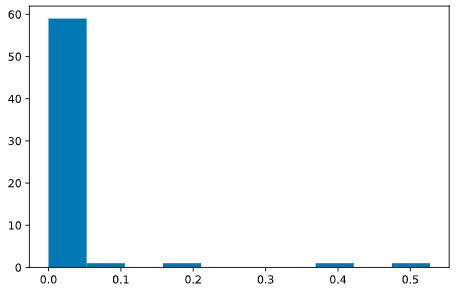

In [ ]:
#Exercise - Matrix Plot
# Import necessary modules
from nxviz import MatrixPlot
import matplotlib.pyplot as plt

# Calculate the largest connected component subgraph: largest_ccs
largest_ccs = sorted(nx.connected_component_subgraphs(G), key=lambda x: len(x))[-1]

# Create the customized MatrixPlot object: h
h = MatrixPlot(graph = largest_ccs, node_grouping= "grouping")

# Draw the MatrixPlot to the screen
h.draw()
plt.show()

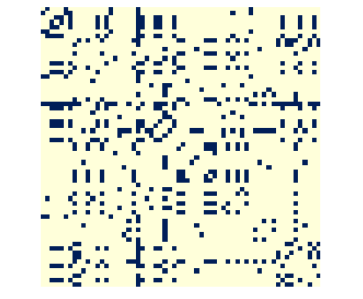

In [ ]:
#Exercise - ArcPlot
# Import necessary modules
from nxviz.plots import ArcPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes in G, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree']= nx.degree(G,n)

# Create the ArcPlot object: a
a = ArcPlot(G, node_order = "degree")

# Draw the ArcPlot to the screen
a.draw()
plt.show()

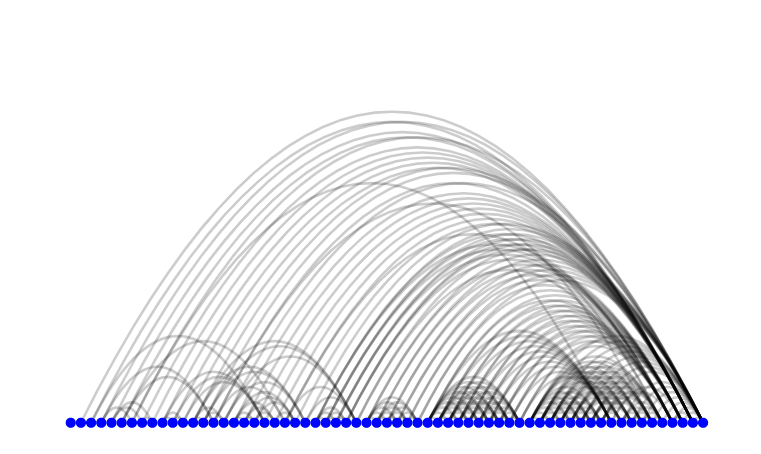

In [ ]:
#Exercise- Circos Plot
# Import necessary modules
from nxviz import CircosPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes, including the metadata
for n, d in G.nodes(data= True):

    # Calculate the degree of each node: G.node[n]['degree']
   G.node[n]['degree'] = nx.degree(G,n)

# Create the CircosPlot object: c
c = CircosPlot(G, node_order = "degree", node_grouping ="grouping", node_color ="grouping")

# Draw the CircosPlot object to the screen
c.draw()
plt.show()

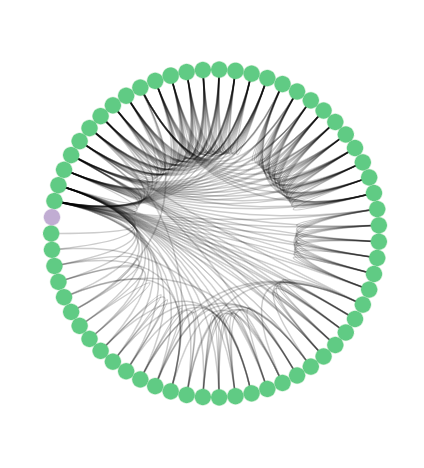

In [ ]:
#Finding cliques (I)
# Calculate the maximal cliques in G: cliques
cliques = nx.find_cliques(G)

# Count and print the number of maximal cliques in G
print(len(list(cliques)))

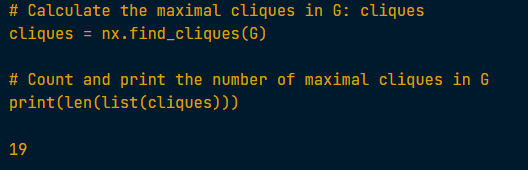

In [ ]:
#Finding cliques (II)
# Import necessary modules
import networkx as nx
from nxviz import CircosPlot
import matplotlib.pyplot as plt

# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(G), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_lc
G_lc = G.subgraph(largest_clique)

# Create the CircosPlot object: c
c = CircosPlot(G_lc, node_labels= True)

# Draw the CircosPlot to the screen
c.draw()
plt.show()

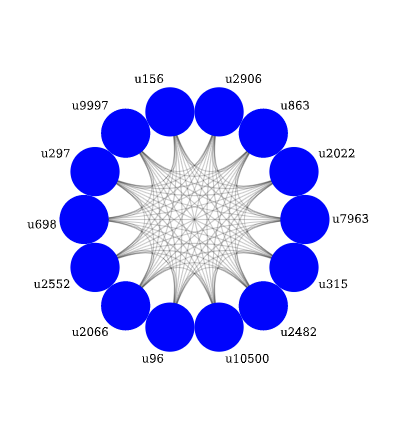

In [ ]:
#Finding important collaborators
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(G)


deg_cent = {k: v for k, v in sorted(deg_cent.items(), key=lambda item: item[1], reverse=True)}
# Compute the maximum degree centrality: max_dc
max_dc = max(list(deg_cent.values()))


# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)

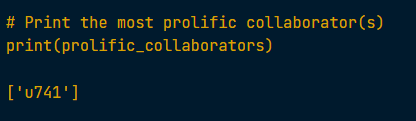

In [ ]:
# Characterizing editing communities
# Import necessary modules
from nxviz import ArcPlot
import matplotlib.pyplot as plt

# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(G), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: G_lmc
G_lmc = G.subgraph(largest_max_clique).copy()  

# Go out 1 degree of separation
for node in list(G_lmc.nodes()):
    G_lmc.add_nodes_from(G.neighbors(node))
    G_lmc.add_edges_from(zip([node]*len(list(G.neighbors(node))),G.neighbors( node)))

# Record each node's degree centrality score
for n in G_lmc.nodes():
    G_lmc.node[n]['degree centrality'] = nx.degree_centrality(G_lmc)[n]

# Create the ArcPlot object: a
a = ArcPlot(G_lmc, node_order = "degree centrality")

# Draw the ArcPlot to the screen
a.draw()
plt.show()

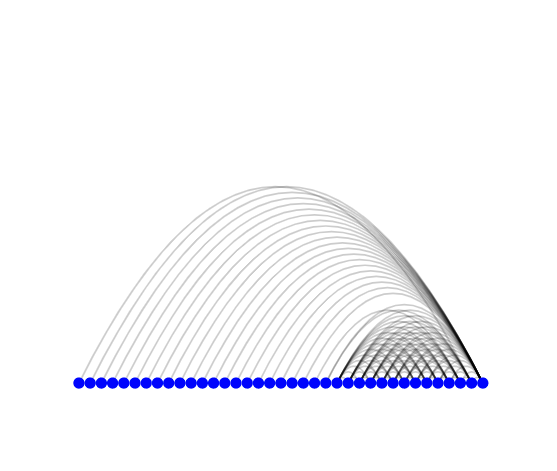

In [ ]:
# Recommending co-editors who have yet to edit together
# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in G.nodes(data =True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):

            # Increment recommended
            recommended[((n1), (n2))] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)


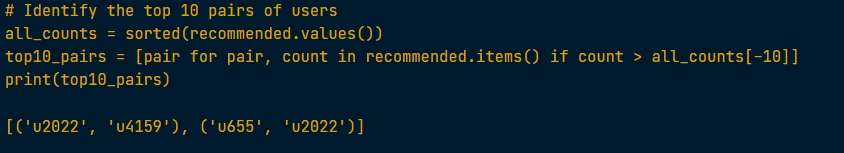